# EDA Project AMCAT Data Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import datetime as dt

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)

In [5]:
raw = pd.read_csv('data.csv')

In [6]:
raw.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [7]:
raw.shape

(3998, 39)

There is an unnamed column and we cannot use this for data analysis. So we need to drop that
column.

In [8]:
raw['Unnamed: 0'].unique()

array(['train'], dtype=object)

In [9]:
data = raw.iloc[:,1:]

In [10]:
data.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

**Dataset consists of :**

- 27 Numerical columns:

   - ID                     
   - Salary                 
   - 10percentage           
   - 12graduation           
   - 12percentage           
   - CollegeID              
   - CollegeTier           
   - collegeGPA             
   - CollegeCityID          
   - CollegeCityTier        
   - GraduationYear         
   - English               
   - Logical                 
   - Quant                   
   - Domain                 
   - ComputerProgramming    
   - ElectronicsAndSemicon  
   - ComputerScience      
   - MechanicalEngg      
   - ElectricalEngg         
   - TelecomEngg          
   - CivilEngg             
   - conscientiousness    
   - agreeableness         
   - extraversion          
   - nueroticism           
   - openess_to_experience  
 
- 8 catogorical columns

    - Designation           
    - JobCity               
    - Gender                
    - 10board               
    - 12board                
    - Degree                
    - Specialization         
    - CollegeState           
 
- 3 datetime

    - DOJ
    - DOL
    - DOB

In [12]:
np.round(data.describe())

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0
mean,663795.0,307700.0,78.0,2008.0,74.0,5157.0,2.0,71.0,5157.0,0.0,2012.0,502.0,502.0,513.0,1.0,353.0,95.0,91.0,23.0,16.0,32.0,3.0,-0.0,0.0,0.0,-0.0,-0.0
std,363218.0,212737.0,10.0,2.0,11.0,4802.0,0.0,8.0,4802.0,0.0,32.0,105.0,87.0,122.0,0.0,205.0,158.0,175.0,98.0,88.0,105.0,37.0,1.0,1.0,1.0,1.0,1.0
min,11244.0,35000.0,43.0,1995.0,40.0,2.0,1.0,6.0,2.0,0.0,0.0,180.0,195.0,120.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-4.0,-6.0,-5.0,-3.0,-7.0
25%,334284.0,180000.0,72.0,2007.0,66.0,494.0,2.0,66.0,494.0,0.0,2012.0,425.0,445.0,430.0,0.0,295.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0
50%,639600.0,300000.0,79.0,2008.0,74.0,3879.0,2.0,72.0,3879.0,0.0,2013.0,500.0,505.0,515.0,1.0,415.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-0.0,-0.0
75%,990480.0,370000.0,86.0,2009.0,83.0,8818.0,2.0,76.0,8818.0,1.0,2014.0,570.0,565.0,595.0,1.0,495.0,233.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0
max,1298275.0,4000000.0,98.0,2013.0,99.0,18409.0,2.0,100.0,18409.0,1.0,2017.0,875.0,795.0,900.0,1.0,840.0,612.0,715.0,623.0,676.0,548.0,516.0,2.0,2.0,3.0,3.0,2.0


## Data Cleaning

Converting DOJ, DOL and DOB inton date time as they are given in timestamp format.

In [13]:
data["DOJ"]=pd.to_datetime(data["DOJ"]).dt.date
data["DOL"].replace("present",dt.datetime.today(),inplace=True)
data['DOL'] = pd.to_datetime(data['DOL']).dt.date
data['DOB'] = pd.to_datetime(data['DOB']).dt.date

In [14]:
data.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,2024-02-23,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-09-01,2024-02-23,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-06-01,2024-02-23,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


As for the DOB we do not need exact date of birth, so we can take usp only year of birth

In [15]:
data['DOB'] = pd.to_datetime(data['DOB']).dt.year

In [16]:
data.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,2024-02-23,senior quality engineer,Bangalore,f,1990,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-09-01,2024-02-23,assistant manager,Indore,m,1989,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-06-01,2024-02-23,systems engineer,Chennai,f,1992,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1989,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


While handling big data, we always tend to check whether there are any missing values or not, as we know there are none null values so we would check for 0 indicated values.

In [17]:
data.isin([-1, 'NaN']).sum()


ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscienti

## Uni-variate and Bi-variate Analysis

In [18]:
data.drop(columns=['CollegeID','CollegeCityID','CollegeCityTier'],axis=1,inplace=True)


### Gender ratio

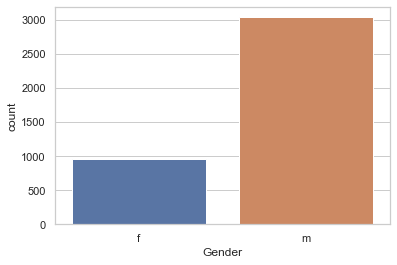

In [21]:
sns.countplot(data['Gender']);

In [22]:
data['Gender'].value_counts()

Gender
m    3041
f     957
Name: count, dtype: int64

The ratio of m/f is 3.19 indicates there are 3 times more men than women employed

### Salary by GEnder

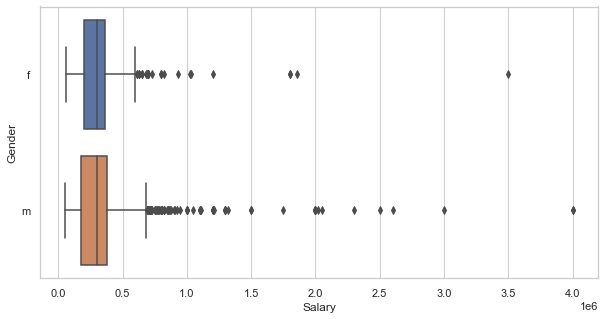

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Salary',y='Gender',data=data);

- It is noted that there are many outliers in the salary data
- There is not much difference between median salary for both genders.
- We can also observe male have more outliers indicating they are more people getting higher pays in male than female category

### Degree

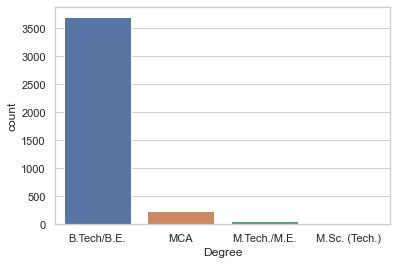

In [24]:
sns.countplot(data['Degree']);

We can normally observe from the plot that mostly AMCAT aspirants are from B Tech domain.

### Salary according to Degree

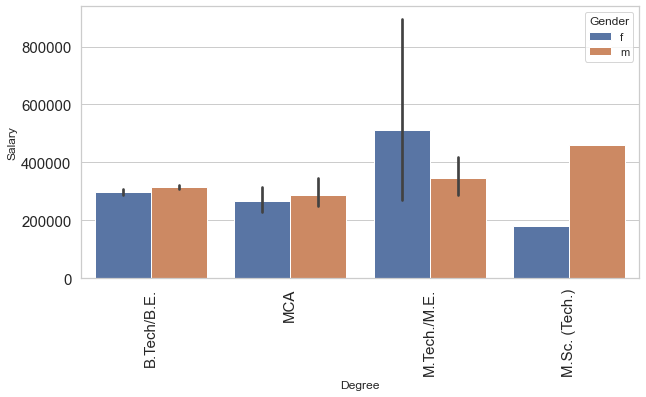

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x='Degree',y='Salary',hue='Gender',data=data)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.show()


We can not conclude much from this but we can say that the people with masters tech degree are getting highly paid as compared to bachelors.

### Designation

In [26]:
popular_Designation = data['Designation'].value_counts()[:10].index.tolist()

In [27]:
popular_Designation

['software engineer',
 'software developer',
 'system engineer',
 'programmer analyst',
 'systems engineer',
 'java software engineer',
 'software test engineer',
 'project engineer',
 'technical support engineer',
 'senior software engineer']

In [28]:
top_Designations = data[data['Designation'].isin(popular_Designation)]

In [29]:
len(data['Designation'].unique())

419

In [30]:
top_Designations.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
2,810601,325000.0,2014-06-01,2024-02-23,systems engineer,Chennai,f,1992,85.00,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.8682,0.6721
3,267447,1100000.0,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1989,85.60,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194
5,1027655,300000.0,2014-06-01,2024-02-23,system engineer,Hyderabad,m,1992,89.92,state board,2010,87.0,state board,2,B.Tech/B.E.,electronics and communication engineering,76.32,Karnataka,2014,560,555,620,-1.000000,645,-1,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.7415,-0.8608
6,947847,300000.0,2014-08-01,2015-05-01,java software engineer,Banglore,m,1993,86.08,state board,2010,67.5,state board,2,B.Tech/B.E.,computer science & engineering,72.98,Karnataka,2014,590,435,380,0.356536,405,-1,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872
9,1203363,230000.0,2014-07-01,2024-02-23,project engineer,Kolkata,m,1993,77.00,cbse,2010,72.2,cbse,2,B.Tech/B.E.,electronics and communication engineering,78.00,West Bengal,2014,605,565,545,0.493596,385,324,-1,-1,-1,-1,-1,-1.3080,0.5454,-0.9122,0.9066,0.0973


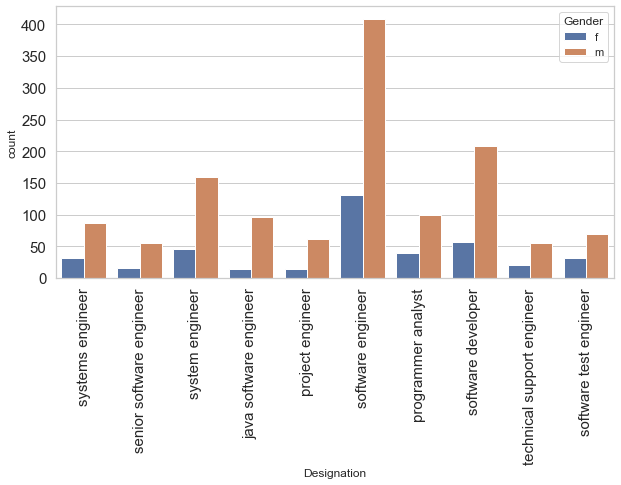

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x='Designation',hue='Gender',data=top_Designations)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.show()


- All the general professions are more dominated by the males as we can there is considerable difference of frequency for every role.
- Here we took the most common roles taken by the amcat aspirants which are mostly 'IT Roles'.

### Salary according to designation

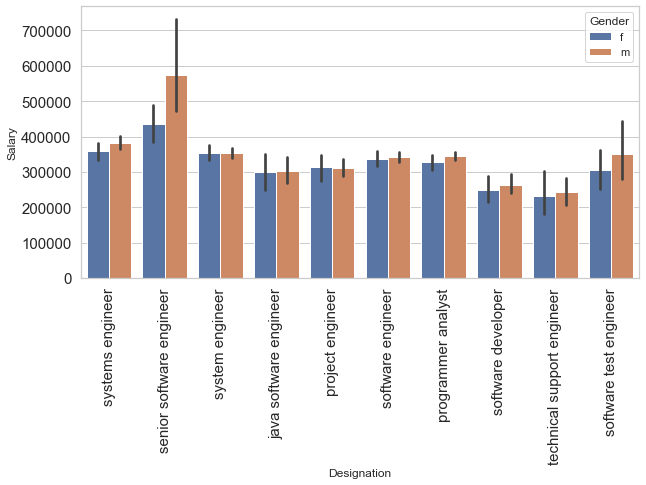

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x='Designation',y='Salary',hue='Gender',data=top_Designations)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.show()


- Among the most popular designations, senior software engineers hare paid higher than others.
- mean salary of top most frequent roles is nearly independent of gender.
- there is some considerable difference in some roles.but we cannot be sure that women is being paid less in that role
- it might be due to experience,specialization etc.

### High paying designation and it's relation with gender

In [33]:
high = list(data.sort_values("Salary",ascending=False)["Designation"].unique())[:10]
high_pay = data[data['Designation'].isin(high)]

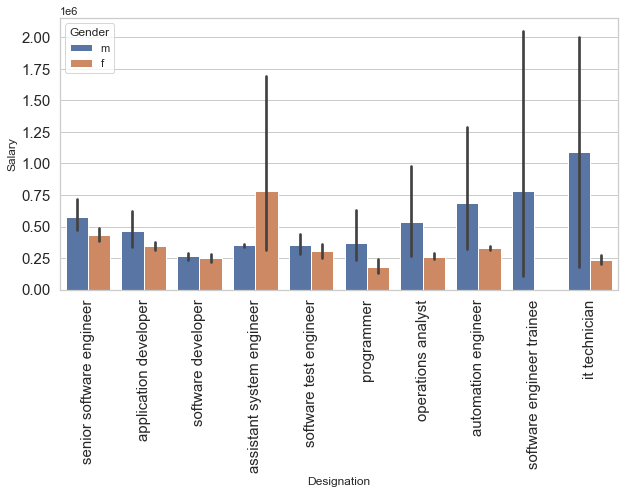

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x='Designation',y='Salary',hue='Gender',data=high_pay)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.show();

- In roles like software engineer trainee there are no women working in these fields.
- it technician is highest paying for men and assistant system engineer is the highest paying role for women.
- The disperancy between pay based on gender might be because of other features like experience,specialization etc.
- In 45% of top paying roles,men are generally paid higher compared to women.
- In 20% of top paying roles,women are paid higher than men


### High School and Intermediate  

**10th Percentage**

In [37]:
data['10percentage'].min()

43.0

In [38]:
data['10percentage'].max()

97.76

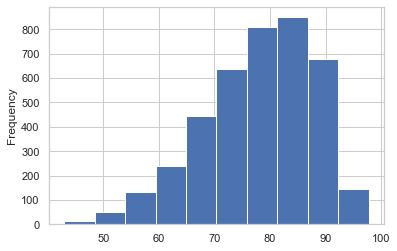

In [40]:
data['10percentage'].plot(kind='hist');

Maximum of the people scored between 80 to 90 percent in 10 th boards

**12th Percentage**

In [41]:
data['12percentage'].min()

40.0

In [42]:
data['12percentage'].max()

98.7

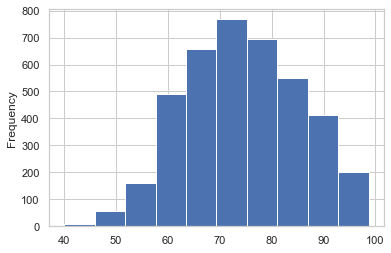

In [43]:
data['12percentage'].plot(kind='hist');

Maximum of the people scored between 70 to 80 percent in 10 th boards

**12th Graduation Year**

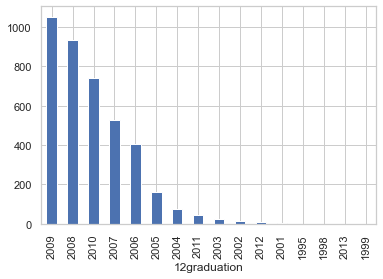

In [44]:
data['12graduation'].value_counts().plot(kind="bar");

We can see that the maximum of the people passed 12th in year 2009-2010.

### Graduation

In [45]:
data['CollegeTier'].value_counts()

CollegeTier
2    3701
1     297
Name: count, dtype: int64

**Graduation Year**

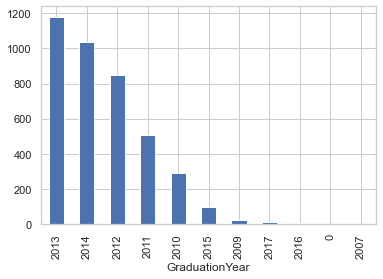

In [46]:
data['GraduationYear'].value_counts().plot(kind="bar");

Most of the people are graduated in year 2013-2014.

**College CGPA**

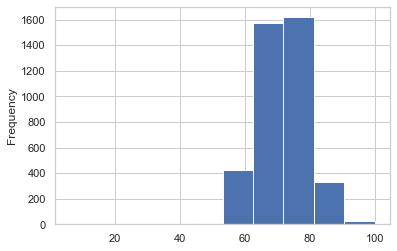

In [47]:
data['collegeGPA'].plot(kind="hist");

Most of the people have CGPA between 65 to 80.

### Marks scored in various subjects

**English**

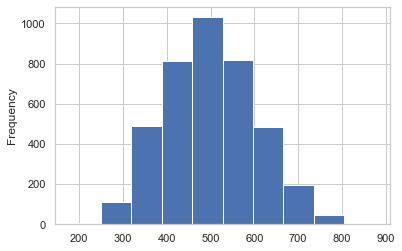

In [49]:
data['English'].plot(kind="hist");

**Logical**

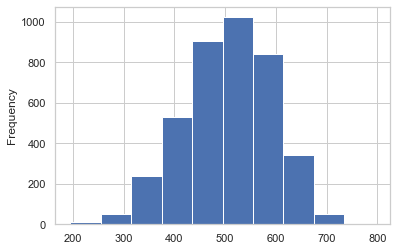

In [50]:
data['Logical'].plot(kind="hist");

**Quant**

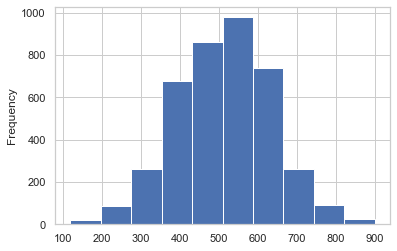

In [52]:
data['Quant'].plot(kind="hist");

**Computer Programming**

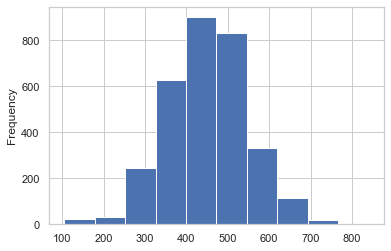

In [56]:
data[data['ComputerProgramming']!=-1]['ComputerProgramming'].plot(kind="hist");

**Electronics and Semicon**

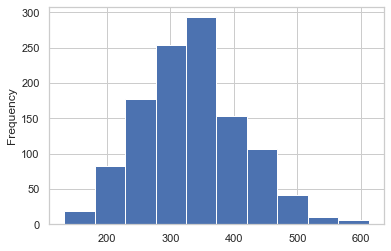

In [57]:
data[data['ElectronicsAndSemicon']!=-1]['ElectronicsAndSemicon'].plot(kind="hist");

**Computer science**

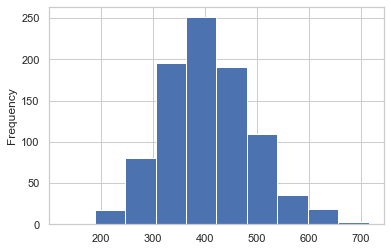

In [58]:
data[data['ComputerScience']!=-1]['ComputerScience'].plot(kind="hist");

**Mechanical Engineering**

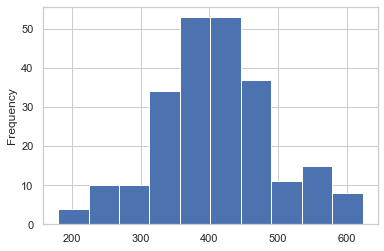

In [59]:
data[data['MechanicalEngg']!=-1]['MechanicalEngg'].plot(kind="hist");

**Electrical Engineering**

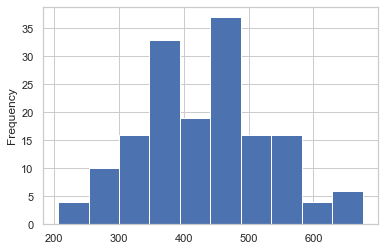

In [60]:
data[data['ElectricalEngg']!=-1]['ElectricalEngg'].plot(kind="hist");

**Telecom engineering**

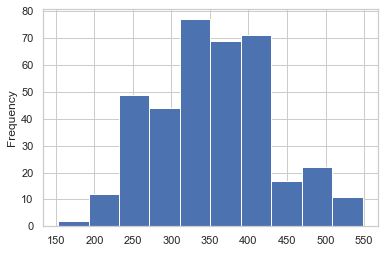

In [61]:
data[data['TelecomEngg']!=-1]['TelecomEngg'].plot(kind="hist");

**Civil Engineering**

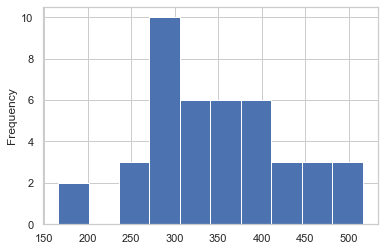

In [62]:
data[data['CivilEngg']!=-1]['CivilEngg'].plot(kind="hist");